In [1]:
#from brainscapes import parcellations, atlases, spaces, features
import brainscapes as bs
from nilearn import plotting

In [2]:
atlas = bs.atlases.MULTILEVEL_HUMAN_ATLAS
atlas.select_parcellation(bs.parcellations.JULICH_BRAIN_PROBABILISTIC_CYTOARCHITECTONIC_ATLAS)
#print(atlas.regiontree)

[brainscapes:INFO]  Selected parcellation "Julich-Brain Probabilistic Cytoarchitectonic Atlas"


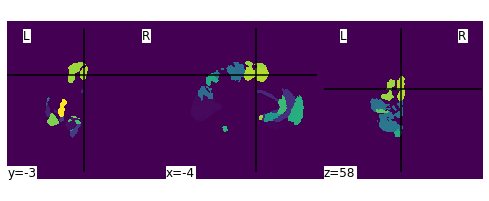

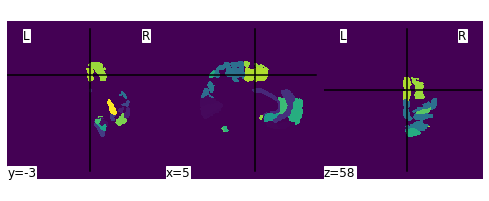

In [3]:
icbm_mri = atlas.get_template(bs.spaces.MNI_152_ICBM_2009C_NONLINEAR_ASYMMETRIC)
icbm_maps = atlas.get_maps(bs.spaces.MNI_COLIN_27)
for name,nib in icbm_maps.items():
    plotting.plot_img(nib)

In [4]:
atlas.select_region(atlas.regionnames.OCCIPITAL_CORTEX)
atlas.selected_region.print_tree()

[brainscapes:INFO]  Selected region occipital cortex


occipital cortex
├── Area hOc2 (V2, 18)
│   ├── Area hOc2 (V2, 18) - left hemisphere
│   └── Area hOc2 (V2, 18) - right hemisphere
└── Area hOc1 (V1, 17, CalcS)
    ├── Area hOc1 (V1, 17, CalcS) - left hemisphere
    └── Area hOc1 (V1, 17, CalcS) - right hemisphere


In [5]:
gexs = atlas.query_data(
    modality=bs.features.modalities.GeneExpression,
    gene=bs.features.gene_names.GABARAPL2)
for gex in gexs:
    print(gex)

[brainscapes:INFO]  Retrieving probe ids for gene GABARAPL2


At ( -19, -62,   9)    race:Hispani  gender:F           age:49      Expression: [10.2,12.9] Z-score: [-0.3,-1.2]
At ( -23, -53,   2)    race:Hispani  gender:F           age:49      Expression: [10.2,13.3] Z-score: [-0.5,-0.1]
At (  -7, -75,   9)    race:Hispani  gender:F           age:49      Expression: [10.1,13.2] Z-score: [-0.5,-0.4]
At (  -6, -86,  10)    race:Hispani  gender:F           age:49      Expression: [10.1,13.2] Z-score: [-0.7,-0.4]
At (  -7, -86,  10)    race:Hispani  gender:F           age:49      Expression: [10.0,13.1] Z-score: [-0.8,-0.8]
At (  -7, -85,  -1)    race:Hispani  gender:F           age:49      Expression: [10.2,13.2] Z-score: [-0.4,-0.5]
At (  -3, -94,   9)    race:Hispani  gender:F           age:49      Expression: [10.2,13.2] Z-score: [-0.4,-0.4]
At ( -10, -75,   2)    race:Hispani  gender:F           age:49      Expression: [10.4,13.4] Z-score: [ 0.2, 0.1]
At (  -6, -94,   5)    race:Hispani  gender:F           age:49      Expression: [10.1,13.3] Z-sc

In [6]:
props = {}
for region in atlas.selected_region.iterate():
    atlas.select_region(region)
    props[region] = atlas.regionprops(bs.spaces.MNI_152_ICBM_2009C_NONLINEAR_ASYMMETRIC)
    print(props[region])
atlas.clear_selection()

[brainscapes:INFO]  Selected region occipital cortex
[brainscapes:INFO]  Selected region Area hOc2 (V2, 18)


          label 1
    centroid_mm [  2.15111856 -84.1809796    3.127959  ]
      volume_mm 50735.0
     surface_mm 14612.135384989228
    is_cortical True


[brainscapes:INFO]  Selected region Area hOc2 (V2, 18) - left hemisphere


          label 1
    centroid_mm [  1.86452958 -86.83247329   4.08438885]
      volume_mm 19185.0
     surface_mm 11194.506064058385
    is_cortical True


[brainscapes:INFO]  Selected region Area hOc2 (V2, 18) - right hemisphere


          label 1
    centroid_mm [  1.86452958 -86.83247329   4.08438885]
      volume_mm 19185.0
     surface_mm 11194.506064058385
    is_cortical True


[brainscapes:INFO]  Selected region Area hOc1 (V1, 17, CalcS)


          label 1
    centroid_mm [  1.86452958 -86.83247329   4.08438885]
      volume_mm 19185.0
     surface_mm 11194.506064058385
    is_cortical True


[brainscapes:INFO]  Selected region Area hOc1 (V1, 17, CalcS) - left hemisphere


          label 1
    centroid_mm [  2.32538827 -82.56865293   2.54637084]
      volume_mm 31550.0
     surface_mm 10621.162107888205
    is_cortical True


[brainscapes:INFO]  Selected region Area hOc1 (V1, 17, CalcS) - right hemisphere


          label 1
    centroid_mm [  2.32538827 -82.56865293   2.54637084]
      volume_mm 31550.0
     surface_mm 10621.162107888205
    is_cortical True


[brainscapes:INFO]  Selected region Julich-Brain Probabilistic Cytoarchitectonic Atlas


          label 1
    centroid_mm [  2.32538827 -82.56865293   2.54637084]
      volume_mm 31550.0
     surface_mm 10621.162107888205
    is_cortical True
